### Perceptron

In [34]:
import numpy as np
class Perceptron:

  def __init__(self, teta, w, n, epochs):
    self.teta = teta
    self.w = w
    self.n = n
    self.epochs = epochs

  def train_perceptron(self,train_x,train_y):

    for i in range(self.epochs):
      for j in range(len(train_x)):

        u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta # Função de Ativação

        y = 1 if u >= 0 else 0 # Função de Saída

        erro = train_y[j] - y

        self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))

        self.teta = self.teta + (self.n * -1 * erro)

  def predict_perceptron(self,test_x):

    results = []

    for i in range(len(test_x)):

        u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta

        r = 1 if u >= 0 else 0
        results.append(r)

    return results

### Perceptron para resolver o AND e o OR

In [35]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])

In [ ]:
## 1) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
## 2) Treinar o AND e depois fazer o predict com a matriz x
## 3) Treinar o OR e depois fazer o predict com a matriz x

In [36]:
# RESPOSTA 1: Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
print("X (entradas):")
for i, entrada in enumerate(x):
    print(f"  {entrada} -> AND: {y_and[i]}, OR: {y_or[i]}")
print()

teta = 0.5
w = [0.2, -0.3]
learning_rate = 0.05
epochs = 200

perceptron = Perceptron(teta, w, learning_rate, epochs)
print(f"Theta (bias): {perceptron.teta}")
print(f"Pesos (w): {perceptron.w}")
print(f"Taxa de aprendizado: {perceptron.n}")
print(f"Épocas: {perceptron.epochs}")

# RESPOSTA 2: Treinar o AND e depois fazer o predict com a matriz x
# Criar novo perceptron para AND
perceptron_and = Perceptron(teta, w.copy(), learning_rate, epochs)

print("ANTES DO TREINAMENTO:")
print(f"Pesos iniciais: {perceptron_and.w}")
print(f"Theta inicial: {perceptron_and.teta}")

# Predição antes do treinamento
pred_before_and = perceptron_and.predict_perceptron(x)
print(f"Predição antes: {pred_before_and}")
print(f"Esperado (AND): {y_and.tolist()}")
print()

# Treinar com dados AND
print("TREINANDO...")
perceptron_and.train_perceptron(x, y_and)

print("APÓS O TREINAMENTO:")
print(f"Pesos finais: {[round(w, 4) for w in perceptron_and.w]}")
print(f"Theta final: {round(perceptron_and.teta, 4)}")

# Predição após treinamento
pred_after_and = perceptron_and.predict_perceptron(x)
print(f"Predição final: {pred_after_and}")
print(f"Esperado (AND): {y_and.tolist()}")

# Verificar acurácia
accuracy_and = np.mean(np.array(pred_after_and) == y_and) * 100
print(f"Acurácia AND: {accuracy_and:.1f}%")


# RESPOSTA 3: Treinar o OR e depois fazer o predict com a matriz x
# Criar novo perceptron para OR (mesma inicialização)
perceptron_or = Perceptron(teta, w.copy(), learning_rate, epochs)


# Predição antes do treinamento
pred_before_or = perceptron_or.predict_perceptron(x)
print(f"Predição antes: {pred_before_or}")
print(f"Esperado (OR): {y_or.tolist()}")
print()

# Treinar com dados OR
perceptron_or.train_perceptron(x, y_or)

# Predição após treinamento
pred_after_or = perceptron_or.predict_perceptron(x)
print(f"Predição final: {pred_after_or}")
print(f"Esperado (OR): {y_or.tolist()}")

# Verificar acurácia
accuracy_or = np.mean(np.array(pred_after_or) == y_or) * 100
print(f"Acurácia OR: {accuracy_or:.1f}%")



X (entradas):
  [0 0] -> AND: 0, OR: 0
  [0 1] -> AND: 0, OR: 1
  [1 0] -> AND: 0, OR: 1
  [1 1] -> AND: 1, OR: 1

Theta (bias): 0.5
Pesos (w): [0.2, -0.3]
Taxa de aprendizado: 0.05
Épocas: 200
ANTES DO TREINAMENTO:
Pesos iniciais: [0.2, -0.3]
Theta inicial: 0.5
Predição antes: [0, 0, 0, 0]
Esperado (AND): [0, 0, 0, 1]

TREINANDO...
APÓS O TREINAMENTO:
Pesos finais: [np.float64(0.35), np.float64(0.05)]
Theta final: 0.35
Predição final: [0, 0, 0, 1]
Esperado (AND): [0, 0, 0, 1]
Acurácia AND: 100.0%
ANTES DO TREINAMENTO:
Pesos iniciais: [0.2, -0.3]
Theta inicial: 0.5
Predição antes: [0, 0, 0, 0]
Esperado (OR): [0, 1, 1, 1]

TREINANDO...
APÓS O TREINAMENTO:
Pesos finais: [np.float64(0.4), np.float64(0.1)]
Theta final: 0.0
Predição final: [0, 1, 1, 1]
Esperado (OR): [0, 1, 1, 1]
Acurácia OR: 100.0%


### Base de Classificação Sintética

In [37]:
## Função para plotar o dataset com o perceptron

def plot_linear_classifier(x, y, w, teta):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + teta
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234) # Gerar dataset com 2 clusters

## 4) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
## 5) Treinar o Perceptron
## 6) Plotar o dataset com os parâmetros do Perceptron usando a função "plot_linear_classifier"

  Theta (bias): -0.2509
  Pesos (w): [0.9014, 0.464]
  Taxa de aprendizado: 0.01
  Épocas: 1000
TREINANDO PERCEPTRON (inicialização aleatória)...
  Acurácia ANTES do treinamento: 98.00%
  Acurácia APÓS o treinamento: 100.00%
  Pesos finais: [np.float64(0.7999), np.float64(0.6049)]
  Theta final: -0.2809


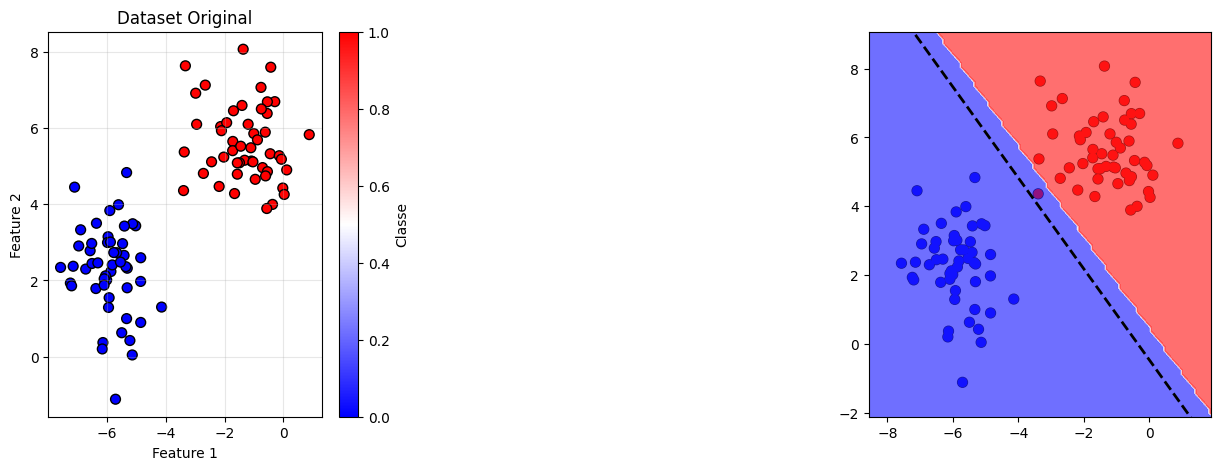

In [20]:
# RESPOSTA 4: Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
np.random.seed(42)  # Para reprodutibilidade
teta_random = np.random.uniform(-1, 1)
w_random = np.random.uniform(-1, 1, 2).tolist()
learning_rate = 0.01
epochs = 1000

perceptron_random = Perceptron(teta_random, w_random, learning_rate, epochs)

# RESPOSTA 5: Treinar o Perceptron
pred_before_random = perceptron_random.predict_perceptron(x)
accuracy_before_random = np.mean(np.array(pred_before_random) == y) * 100

perceptron_random.train_perceptron(x, y)
pred_after_random = perceptron_random.predict_perceptron(x)
accuracy_after_random = np.mean(np.array(pred_after_random) == y) * 100

print(f"  Acurácia ANTES do treinamento: {accuracy_before_random:.2f}%")
print(f"  Acurácia APÓS o treinamento: {accuracy_after_random:.2f}%")
# Plot do dataset original
plt.figure(figsize=(15, 5))

# Subplot 1: Dataset original
plt.subplot(1, 3, 1)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr', s=50, edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Original')
plt.grid(True, alpha=0.3)
plt.colorbar(label='Classe')

x1_min, x1_max = x[:,0].min(), x[:,0].max()
x2_min, x2_max = x[:,1].min(), x[:,1].max()
x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
x_mesh = np.array([x1.ravel(), x2.ravel()]).T

plt.subplot(1, 3, 3)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr', s=50, edgecolors='black')
y_mesh = np.dot(x_mesh, np.array(perceptron_random.w).reshape(1, -1).T) + perceptron_random.teta
y_mesh = np.where(y_mesh <= 0, 0, 1)
plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.3)

# Linha de decisão
if perceptron_random.w[1] != 0:
    x_line = np.linspace(x1_min-1, x1_max+1, 100)
    y_line = (perceptron_random.teta - perceptron_random.w[0] * x_line) / perceptron_random.w[1]
    plt.plot(x_line, y_line, 'k--', linewidth=2)

plot_linear_classifier(x, y, perceptron_random.w, perceptron_random.teta)
plt.show()

In [38]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

## 7) Fazer o predict do Perceptron usando a matriz x
## 8) Calcular a acurácia com a função: "accuracy_score" e printar o resultado

In [25]:
# RESPOSTA 7) Fazer o predict do Perceptron usando a matriz x
# Fazer predições com ambos os perceptrons
predictions_random = perceptron_random.predict_perceptron(x)
print()

# RESPOSTA 8) Calcular a acurácia com a função: "accuracy_score" e printar o resultado
# Calcular acurácia usando accuracy_score do sklearn
accuracy_random_sklearn = accuracy_score(y, predictions_random)

print("ACURÁCIA CALCULADA COM accuracy_score:")
print(f"Perceptron (Inicialização Aleatória): {accuracy_random_sklearn:.4f} ({accuracy_random_sklearn*100:.2f}%)")
print()

# Comparar com cálculo manual
print("COMPARAÇÃO COM CÁLCULO MANUAL:")
manual_accuracy_random = np.mean(np.array(predictions_random) == y)

print(f"Perceptron (Aleatório) - Manual:         {manual_accuracy_random:.4f} ({manual_accuracy_random*100:.2f}%)")
print(f"Perceptron (Aleatório) - accuracy_score: {accuracy_random_sklearn:.4f} ({accuracy_random_sklearn*100:.2f}%)")
print(f"Diferença: {abs(manual_accuracy_random - accuracy_random_sklearn):.6f}")
print()

# Análise detalhada dos erros (se houver)
errors_random = np.sum(np.array(predictions_random) != y)

print("ANÁLISE DE ERROS:")
print(f"Perceptron (Aleatório): {errors_random} erros de {len(y)} amostras")

if errors_random > 0:
    print("\nERROS DO PERCEPTRON (Aleatório):")
    error_indices = np.where(np.array(predictions_random) != y)[0]
    for idx in error_indices[:5]:  # Mostrar apenas os primeiros 5 erros
        print(f"  Amostra {idx}: x={x[idx]}, Real={y[idx]}, Predito={predictions_random[idx]}")

print()

PREDIÇÕES DO PERCEPTRON (Inicialização Aleatória):
Primeiras 10 predições: [1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
Valores reais (y):      [1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
Total de predições: 100

ACURÁCIA CALCULADA COM accuracy_score:
Perceptron (Inicialização Aleatória): 1.0000 (100.00%)

COMPARAÇÃO COM CÁLCULO MANUAL:
Perceptron (Aleatório) - Manual:         1.0000 (100.00%)
Perceptron (Aleatório) - accuracy_score: 1.0000 (100.00%)
Diferença: 0.000000

ANÁLISE DE ERROS:
Perceptron (Aleatório): 0 erros de 100 amostras



### Dataset Sintético

(-0.1, 1.1)

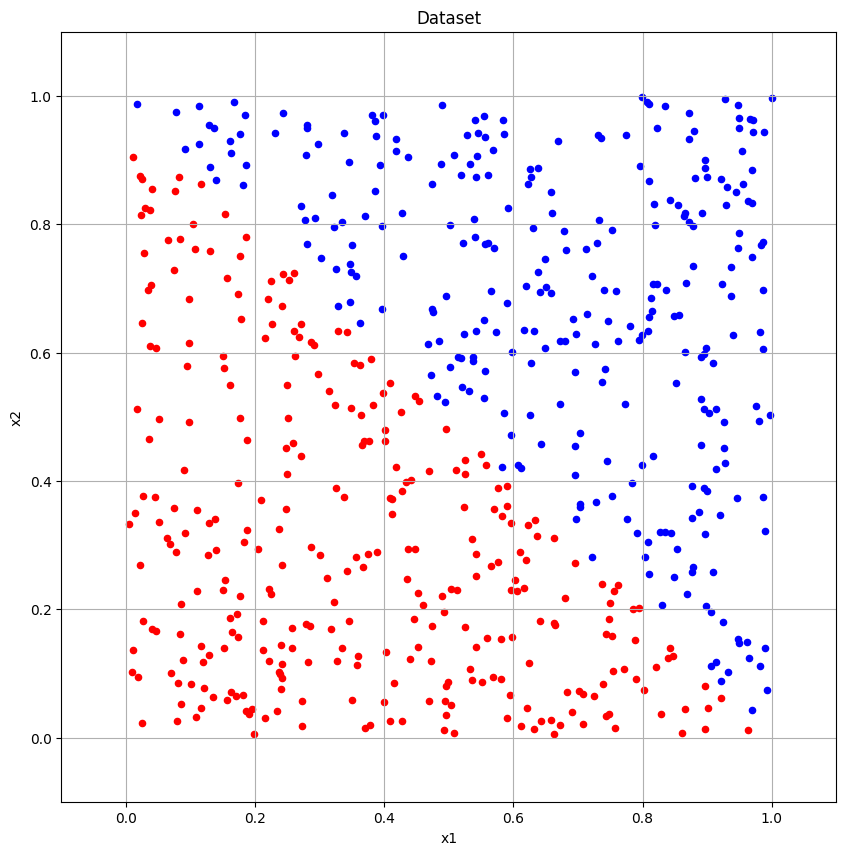

In [27]:
import pandas as pd

df = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))

#### Plotar o Dataset Sintético
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

df['y'] = df.apply(testing, axis=1)

df[df.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
df[df.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title('Dataset')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

In [28]:
y = df['y'] # extrai a primeira coluna, que é o label
X = df.loc[:, 'x1':'x2']

In [39]:
from sklearn.model_selection import train_test_split

## 9) Separar os dados em treinamento e teste
## 10) Inicializar o Perceptron com os parâmetros necessários
## 11) Converter os conjuntos em list, ex: "train_x = X_train.values.tolist()"
## 12) Treinar o perceptron

In [40]:
# RESPOSTA 9) Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dataset original: {len(X)} amostras")
print(f"Conjunto de treinamento: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Conjunto de teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

print("Distribuição de classes no conjunto de treinamento:")
print(f"  Classe 0: {np.sum(y_train==0)} amostras ({np.sum(y_train==0)/len(y_train)*100:.1f}%)")
print(f"  Classe 1: {np.sum(y_train==1)} amostras ({np.sum(y_train==1)/len(y_train)*100:.1f}%)")

print("Distribuição de classes no conjunto de teste:")
print(f"  Classe 0: {np.sum(y_test==0)} amostras ({np.sum(y_test==0)/len(y_test)*100:.1f}%)")
print(f"  Classe 1: {np.sum(y_test==1)} amostras ({np.sum(y_test==1)/len(y_test)*100:.1f}%)")

# RESPOSTA 10) Inicializar o Perceptron com os parâmetros necessários
# Alternativa com inicialização aleatória
print("Inicialização alternativa (aleatória):")
np.random.seed(123)
teta_random = np.random.uniform(-0.5, 0.5)
w_random = np.random.uniform(-0.5, 0.5, 2).tolist()

perceptron_random = Perceptron(teta_random, w_random, learning_rate, epochs)

# RESPOSTA 11) Converter os conjuntos em list, ex: "train_x = X_train.values.tolist()"

# Converter DataFrames em listas
train_x = X_train.values.tolist()
train_y = y_train.values.tolist()
test_x = X_test.values.tolist()
test_y = y_test.values.tolist()

print(f"train_x: {type(train_x)}, tamanho: {len(train_x)}")
print(f"train_y: {type(train_y)}, tamanho: {len(train_y)}")
print(f"test_x: {type(test_x)}, tamanho: {len(test_x)}")
print(f"test_y: {type(test_y)}, tamanho: {len(test_y)}")


Dataset original: 600 amostras
Conjunto de treinamento: 420 amostras (70.0%)
Conjunto de teste: 180 amostras (30.0%)
Distribuição de classes no conjunto de treinamento:
  Classe 0: 216 amostras (51.4%)
  Classe 1: 204 amostras (48.6%)
Distribuição de classes no conjunto de teste:
  Classe 0: 93 amostras (51.7%)
  Classe 1: 87 amostras (48.3%)
Inicialização alternativa (aleatória):
  Theta (bias): 0.1965
  Pesos (w): [-0.2139, -0.2731]
Conversão realizada com sucesso!
train_x: <class 'list'>, tamanho: 420
train_y: <class 'list'>, tamanho: 420
test_x: <class 'list'>, tamanho: 180
test_y: <class 'list'>, tamanho: 180
Primeiras 5 amostras de treinamento:
  train_x[0] = [0.4254364386164168, 0.507610378684455], train_y[0] = 0
  train_x[1] = [0.9862107444796029, 0.6981617140197451], train_y[1] = 1
  train_x[2] = [0.35071181545171015, 0.7671882889311269], train_y[2] = 1
  train_x[3] = [0.9691026301408113, 0.8837858849634257], train_y[3] = 1
  train_x[4] = [0.7081720886452816, 0.067350601468771

In [30]:
from sklearn import metrics

## 13) Fazer o predict do Perceptron usando a matriz x
## 14) Calcular a acurácia com a função: "accuracy_score" e printar o resultado

In [41]:
from sklearn.metrics import accuracy_score

# RESPOSTA QUESTÃO 13) Fazer o predict do Perceptron usando a matriz x
predictions = perceptron_random.predict_perceptron(x)
print("Predições feitas pelo Perceptron:")
print(predictions)

# RESPOSTA QUESTÃO 14) Calcular a acurácia com a função: "accuracy_score" e printar o resultado
# Calcular a acurácia usando a função accuracy_score
predictions_test = perceptron_random.predict_perceptron(test_x)

accuracy_test = accuracy_score(test_y, predictions_test)
print(f"Acurácia no conjunto de teste: {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")

Predições feitas pelo Perceptron:
[0, 0, 0, 0]
Acurácia no conjunto de teste: 0.5167 (51.67%)
